In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Basic Random Number Generator

Consider the function: 

x' = (ax + c) mod m

where a, c and m are integer constants, and x is an integer variable. Recall that "n mod m"  means the remainder when n is divided by m.

Now we can use this to generate a sequence of numbers by putting the outcome of this equation (x') back in as the new starting value (x). These will act like random numbers. Try it.....

Starting from x = 1 write a short programme which generates 100 values in this sequence and plots them on a graph. Please use the following inputs: 

a = 1664525

c = 1013904223

m = 4294967296

Tip 1: python syntax for "mod m" is: 

>%m

So your base code will look like: 

> xp = (a*x+c)%m

Extension problem: this won't work for all values of a, c and m. Can you find some which don't generate pseudo-random numbers?  

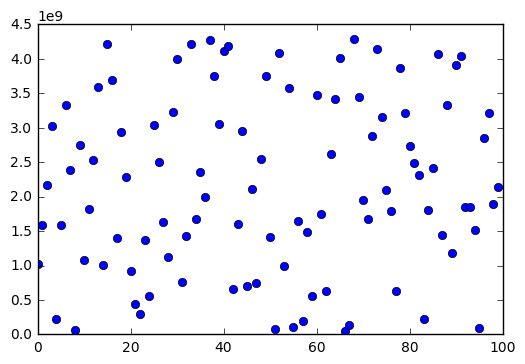

In [9]:
'''Define inputs'''
N = 100
a = 1664525
c = 1013904223
m = 4294967296
x=1
results = []
'''Do the loop'''

for i in range(N):
    x = (a*x+c)%m
    results.append(x) 
'''Plot the results'''
plt.plot(results,"o")
plt.show()
    

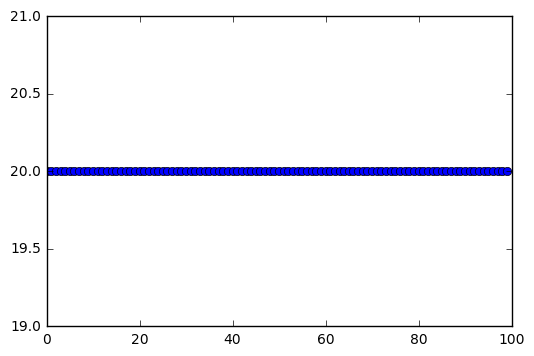

In [7]:
#This won't create random numbers. 

'''Define inputs'''
N = 100
a = 16000001
c = 1200000000
m = 40000000
x=20
results = []
'''Do the loop'''

for i in range(N):
    x = (a*x+c)%m
    results.append(x) 
'''Plot the results'''
plt.plot(results,"o")
plt.show()
    

# In Class Exercise - Rolling Dice

1. Write a programme that generates and prints out two random numbers between 1 and 6. This simulates the rolling of two dice.

2. Now modify the programme to simulate making 2 million rolls of two dice. What fraction of the time do you get double six? 

3. Extension: Plot a histogram of the frequency of the total of the two dice over the 2 million rolls.

In [25]:
result=np.random.randint(1,7,size=2)
print(result)
print(sum(result))

[3 4]
7


In [10]:
result=[]
Ntot=2000000
for i in range(Ntot):
    tot=sum(np.random.randint(1,7,size=2))
    result.append(tot)

N6=result.count(12)
print("The fraction of times two sixes are rolled is: ", 1.*N6/(1.*Ntot))
print("or alternatively: 1/",1.*Ntot/(1.*N6))


The fraction of times two sixes are rolled is:  0.027717
or alternatively: 1/ 36.078940722300395


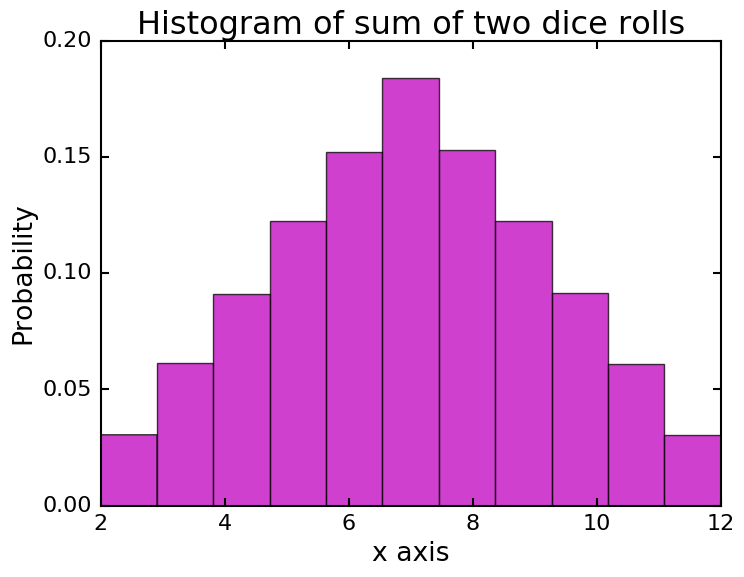

In [35]:
#Using mpl_style file.
import mpl_style
plt.style.use(mpl_style.style1)

# the histogram of the data
n, bins, patches = plt.hist(result, 11, normed=1, facecolor='m', alpha=0.75)

#alpha is a parameter which sets the saturation of the colour
#normed normalises the area to 1.  

plt.xlabel('x axis')
plt.ylabel('Probability')
plt.title('Histogram of sum of two dice rolls')


# Thallium Decay

Simulate the decay of 1000 thallium atoms over time, using random number generators to mimick the random process of atomic decay. 

Thallium-208 decays to stable lead (208) with a half life of 3.053 minutes.

The standard equation of radioactive decay (for the number of atoms in the sample as a function of time) is: 

$$N(t) = N(0) 2^{-t/\tau}$$

where tau is the half life, N(0) is the number of atoms at t=0. Notice that both t and tau must be in the same units. 

The fraction of atoms which have not yet decayed at any time t, is then: 

$$N(t)/N(0) = 2^{-t/\tau}$$

So then the probability that any given atom has decayed by time t (which is the same as the fraction of atoms that have decayed by that time) is: 

$$p(t) = 1 - 2^{-t/\tau}$$

Use time steps of 1 second and make a plot of the number of thallium and lead atoms as a function of time until 20 minutes have passed. Overplot the half-life of thallium. 


0.003776817392159071


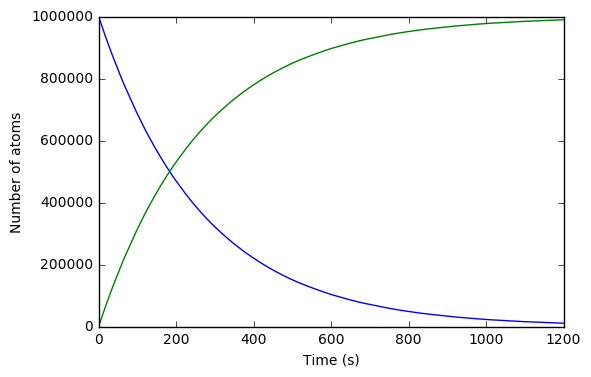

In [13]:
#Define some constants/starting parameters

NTl = 1000000     #Starting number of Thallium atoms
NPb = 0        #Starting number of Lead atoms
tau = 3.053*60 #Half life of Thallium in seconds
dt = 1.0       #Time step in seconds
tmax = 20.*60  #Maximum time in seconds

#Probability of decay per time step
p = 1 - 2**(-dt/tau) 
print(p)

#Define a list of time steps, and numbers of Thallium and Lead at each step
t = np.arange(0.0,tmax,dt)
NTlsave = []
NPbsave = []

#Loop over time steps

for tloop in t: 
    NTlsave.append(NTl)
    NPbsave.append(NPb)
    
    decay=0
    for i in range(NTl):
        x=np.random.random()
        #print(x)
        if x<p:
            decay=decay+1 #Or could do decay +=1
            #print(decay)
    NTl-=decay
    NPb+=decay
    #print(NTl,NPb)

#Make a graph
plt.plot(t,NTlsave)
plt.plot(t,NPbsave)
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")
plt.show()

Redo the radioactive decay problem, but now make use of non-uniform random numbers, to draw N random numbers representing the decay time of N atoms. 

You can make the plot much more quickly, with a bit of help from the ```sort``` function in ```numpy```.

Extension: Also try the rejection method. Notice how similar the code is to the first way we did the problem. 


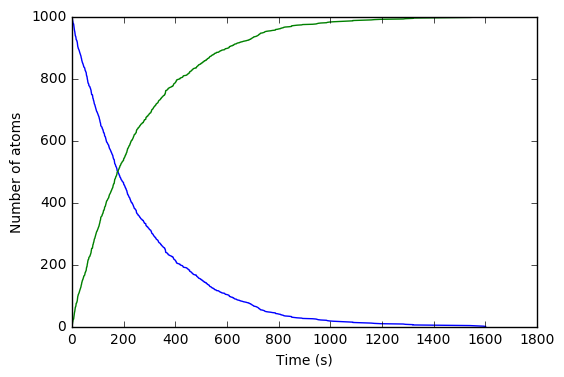

In [37]:
#Define some constants/starting parameters

NTl = 1000     #Starting number of Thallium atoms
tau = 3.053*60 #Half life of Thallium in seconds
dt = 1.0       #Time step in seconds
tmax = 20.*60  #Maximum time in seconds
mu = np.log(2)/tau

# Decay time of each of the N atoms. 
# First generate N random numbers from the uniform distribution between t=0 to tmax.

x = np.random.random(NTl)

tdec = -1/mu*np.log(1-x)
tdec = np.sort(tdec)
NPb = np.arange(1,NTl+1)

NTlsurvived = -NPb + NTl

plt.plot(tdec,NTlsurvived)
plt.plot(tdec,NPb)
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")
plt.show()

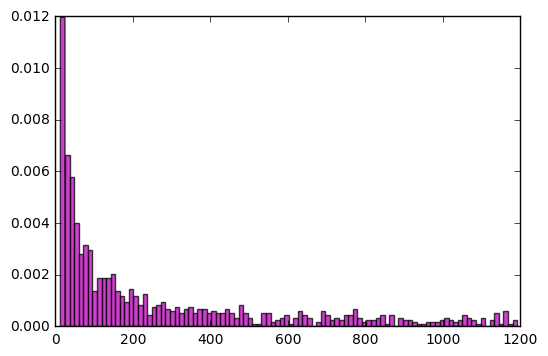

ValueError: x and y must have same first dimension

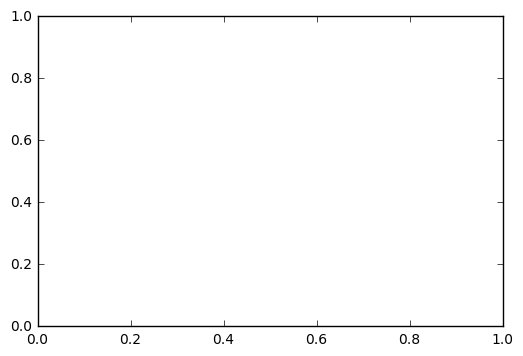